# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("./hw7_data/blobs2.csv")

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("label", axis=1), data.label)

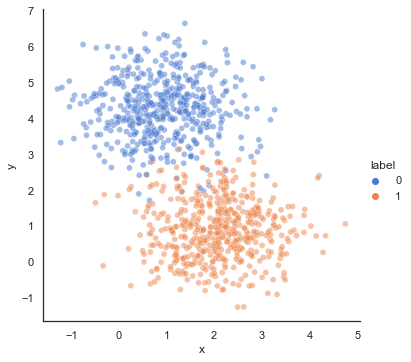

In [3]:
import seaborn as sns

sns.set_theme(style="white")
sns.relplot(x="x", y="y", hue="label", sizes=(40, 400),
            alpha=.5, palette="muted", data=data);

In [4]:
def plot_contours(ax, model, xx, yy, **params):
    """Plot the decision boundaries for a classifier."""
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Ошибка SVM c ядром linear kernel - 0.9773333333333334
Ошибка SVM c ядром polynomial (2) kernel - 0.976
Ошибка SVM c ядром polynomial (3) kernel - 0.9786666666666667
Ошибка SVM c ядром polynomial (5) kernel - 0.984
Ошибка SVM c ядром RBF kernel - 0.9733333333333334


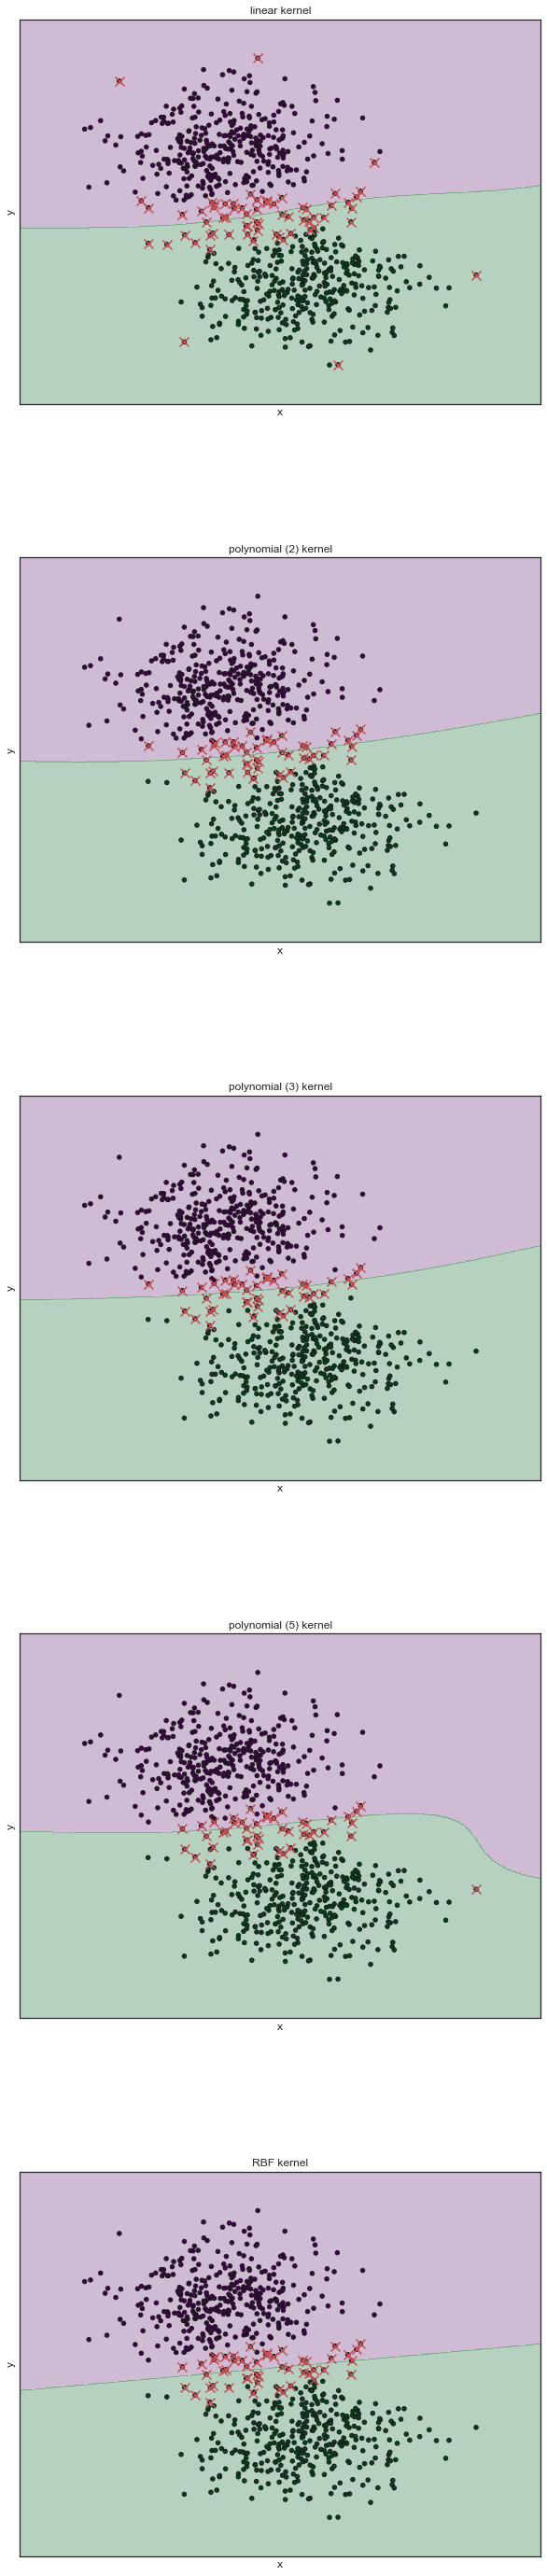

In [5]:
models = (
    SVC(kernel="rbf"),
    SVC(kernel="poly", degree=2),
    SVC(kernel="poly", degree=3),
    SVC(kernel="poly", degree=5),
    SVC(kernel="linear"),
)

titles = (
    'linear kernel',
    'polynomial (2) kernel',
    'polynomial (3) kernel',
    'polynomial (5) kernel',
    'RBF kernel',
)

for title, model in zip(titles, models):
    model.fit(X_train, y_train)
    print(f'Ошибка SVM c ядром {title} - {model.score(X_train, y_train)}')
          
fig, sub = plt.subplots(5, 1, figsize=(10,50))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train.values[:, 0], X_train.values[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1

h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for model, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.PRGn, alpha=0.3)
    
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.PRGn, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               marker='x', s=100, color='r')
          
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [6]:
from random_forest import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

data = pd.read_csv('./hw2_data/spam.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop("label", axis=1), data.label)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Выборка сбалансированная - используем accuracy 

In [7]:
%%time
# Время больше, так как используется собственная реализация random forest
rf = RandomForestClassifier(70)
rf.fit(X_train, y_train.values)
y_pred = rf.predict(X_test)
(y_pred == y_test).mean()

CPU times: user 16.1 s, sys: 170 ms, total: 16.3 s
Wall time: 16.9 s


0.9365768896611643

In [8]:
%%time
svm = SVC(C=8)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

CPU times: user 438 ms, sys: 19 ms, total: 457 ms
Wall time: 570 ms


0.9339704604691572

In [9]:
data = pd.read_csv('./hw2_data/cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop("label", axis=1), data.label)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Выборка не сбалансированная - используем roc auc score

In [10]:
%%time
rf = RandomForestClassifier(5)
y_train_rf, y_test_rf = (y_train=="M").astype(int), (y_test=="M").astype(int)
rf.fit(X_train, y_train_rf.values)
roc_auc_score(y_test_rf, rf.predict_proba(X_test).T[1])

CPU times: user 3.04 s, sys: 28.6 ms, total: 3.07 s
Wall time: 3.16 s


0.9854058376649341

In [12]:
%%time
svm = SVC(C=8, probability=True)
svm.fit(X_train, y_train)
roc_auc_score(y_test, svm.predict_proba(X_test).T[1])

CPU times: user 20.6 ms, sys: 2.08 ms, total: 22.7 ms
Wall time: 21.3 ms


0.994202319072371